<img src="https://cybersecurity-excellence-awards.com/wp-content/uploads/2017/06/366812.png">

<h1><center>Darwin Supervised Regression Model Building </center></h1>

Prior to getting started, there are a few things you want to do:
1. Set the dataset path.
2. Enter your username and password to ensure that you're able to log in successfully

Once you're up and running, here are a few things to be mindful of:
1. For every run, look up the job status (i.e. requested, failed, running, completed) and wait for job to complete before proceeding. 
2. If you're not satisfied with your model and think that Darwin can do better by exploring a larger search space, use the resume function.

## Import libraries

In [2]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
from sklearn.metrics import r2_score

from amb_sdk.sdk import DarwinSdk

In [3]:
import os
os.environ["PYTHONPATH"] = "../../"
print(os.environ['PYTHONPATH'])
print(os.getcwd())
import sys
sys.path.append('../../../')
from amb_sdk.sdk import DarwinSdk

../../
C:\Turbo\University\DataAnalytics\Project\airbnb_darwin


## Setup

**Login to Darwin**<br>
Enter your registered username and password below to login to Darwin.

In [4]:
# Login
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')
status, msg = ds.auth_login_user('yasser@utexas.edu', 'En5dC4ZGwL')
if not status:
    print(msg)

**Data Path** <br>
In the cell below, set the path to your dataset, the default is Darwin's example datasets

In [6]:
path = 'listings/'

## Data Upload and Clean

**Read dataset and view a file snippet**

After setting up the dataset path, the next step is to upload the dataset from your local device to the server. <br> In the cell below, you need to specify the dataset_name if you want to use your own data.

In [7]:
dataset_name = 'austin_listings.csv'
df = pd.read_csv(os.path.join(path, dataset_name))
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1078,*UT/Hyde Park Craftsman Apartment,4635658,Tracy,NaN,78705,30.30123,-97.73674,Entire home/apt,85,1,208,2017-07-14,1.63,3,43
1,2265,Zen-East in the Heart of Austin,2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,225,2,23,2018-09-16,0.19,3,125
2,5245,"Green, Colorful, Clean & Cozy home",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,100,28,9,2018-03-14,0.07,3,3
3,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,95,2,472,2019-02-22,3.88,1,302
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45596,-97.78370,Private room,40,1,240,2019-02-24,2.21,1,72


**Upload dataset to Darwin**

In [9]:
# Upload dataset
status, message = ds.delete_dataset(dataset_name)
status, dataset = ds.upload_dataset(os.path.join(path, dataset_name))
if not status:
    print(dataset)

** clean dataset **

In [11]:
# clean dataset
target = "price"
status, job_id = ds.clean_data(dataset_name, target = target)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-17T16:34:09.111613', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['austin_listings.csv'], 'artifact_names': ['9bc7d65eaffd4fb5b6d0e2ffa4a75bec'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-17T16:34:09.111613', 'endtime': '2019-04-17T16:34:12.074172', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['austin_listings.csv'], 'artifact_names': ['9bc7d65eaffd4fb5b6d0e2ffa4a75bec'], 'model_name': None, 'job_error': ''}


## Create and Train Model 

We will now build a model that will learn the class labels in the target column.<br> In the default boston dataset, the target column is "Assessed_Value". <br> You will have to specify your own target name for your custom dataset. <br> You can also increase max_train_time for longer training.


In [15]:
model = target + "_model1"
status, job_id = ds.create_model(dataset_names = dataset_name, \
                                 model_name =  model, \
                                 max_train_time = '00:02')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-17T16:35:49.47834', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['austin_listings.csv'], 'artifact_names': None, 'model_name': 'price_model1', 'job_error': None}
{'status': 'Requested', 'starttime': '2019-04-17T16:35:49.47834', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['austin_listings.csv'], 'artifact_names': None, 'model_name': 'price_model1', 'job_error': None}
{'status': 'Requested', 'starttime': '2019-04-17T16:35:49.47834', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['austin_listings.csv'], 'artifact_names': None, 'model_name': 'price_model1', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-17T16:35:49.47834', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, '

## Extra Training (Optional)
Run the following cell for extra training, no need to specify parameters

In [17]:
# Train some more
status, job_id = ds.resume_training_model(dataset_names = dataset_name,
                                          model_name = model,
                                          max_train_time = '00:01')
                                          
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-17T16:41:40.174492', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.45108547806739807, 'generations': 8, 'dataset_names': ['austin_listings.csv'], 'artifact_names': None, 'model_name': 'price_model1', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-17T16:41:40.174492', 'endtime': None, 'percent_complete': 11, 'job_type': 'UpdateModel', 'loss': 0.45108547806739807, 'generations': 11, 'dataset_names': ['austin_listings.csv'], 'artifact_names': None, 'model_name': 'price_model1', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-17T16:41:40.174492', 'endtime': None, 'percent_complete': 11, 'job_type': 'UpdateModel', 'loss': 0.45108547806739807, 'generations': 11, 'dataset_names': ['austin_listings.csv'], 'artifact_names': None, 'model_name': 'price_model1', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-17T16:41:40.174492', 'endtime': None, 'percent_complete': 11, 'job_type'

## Analyze Model
Analyze model provides feature importance ranked by the model. <br> It indicates a general view of which features pose a bigger impact on the model

In [25]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Running', 'starttime': '2019-04-17T16:51:17.955144', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 0.45108547806739807, 'generations': 11, 'dataset_names': None, 'artifact_names': ['697534f3ddee47f8ae7154cc20bed128'], 'model_name': 'price_model1', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-17T16:51:17.955144', 'endtime': '2019-04-17T16:51:19.763805', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 0.45108547806739807, 'generations': 11, 'dataset_names': None, 'artifact_names': ['697534f3ddee47f8ae7154cc20bed128'], 'model_name': 'price_model1', 'job_error': ''}


Show the 10 most important features of the model.

In [19]:
feature_importance[:10]

calculated_host_listings_count    0.382564
number_of_reviews                 0.116360
id                                0.096161
longitude                         0.086906
minimum_nights                    0.066169
availability_365                  0.063779
latitude                          0.049485
host_id                           0.045669
reviews_per_month                 0.038161
room_type = Private room          0.027108
dtype: float64

## Predictions
**Perform model prediction on the the training dataset.**

In [20]:
status, artifact = ds.run_model(dataset_name, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-17T16:43:50.09261', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.45108547806739807, 'generations': 11, 'dataset_names': ['austin_listings.csv'], 'artifact_names': ['6094961577814e769b8ffd0f157d766b'], 'model_name': 'price_model1', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-17T16:43:50.09261', 'endtime': '2019-04-17T16:43:58.413166', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.45108547806739807, 'generations': 11, 'dataset_names': ['austin_listings.csv'], 'artifact_names': ['6094961577814e769b8ffd0f157d766b'], 'model_name': 'price_model1', 'job_error': ''}


(True, 'Job completed')

Download predictions from Darwin's server.

In [21]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head()

,price
0,88.644135
1,229.528336
2,-16.643385
3,128.477753
4,-303.678894


Create plots comparing predictions with actual target

R^2 :  0.8575322075994887


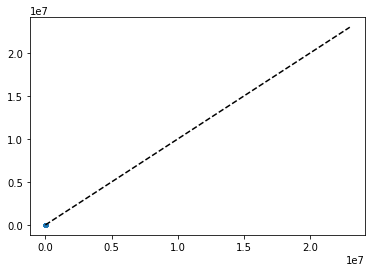

In [23]:
#Plot predictions vs actual
plt.plot(df[target], prediction[target], '.')
plt.plot([0,2.3e7],[0,2.3e7],'--k')
print('R^2 : ', r2_score(df[target], prediction[target]))

## Find out which machine learning model did Darwin use:

In [24]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

{'type': 'XGBRegressor', 'parameters': {}}
